In [1]:
from model.standard_lstm import StandardLSTM
instance = StandardLSTM(1001115026824)
# score = instance.fit_model()

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


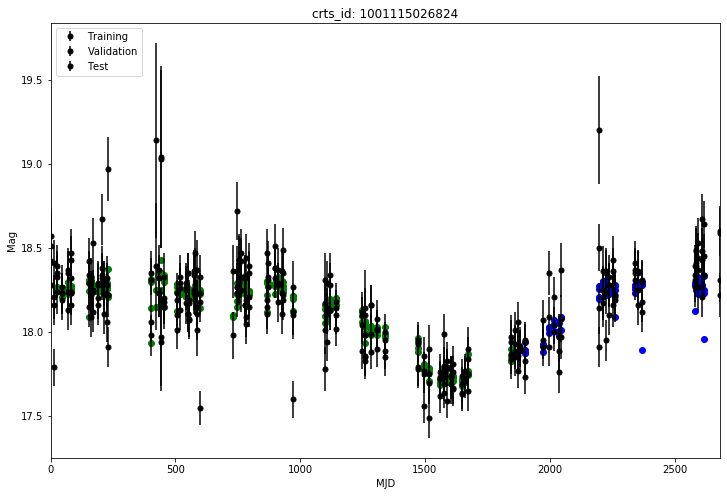

In [2]:
instance.one_step_prediction()

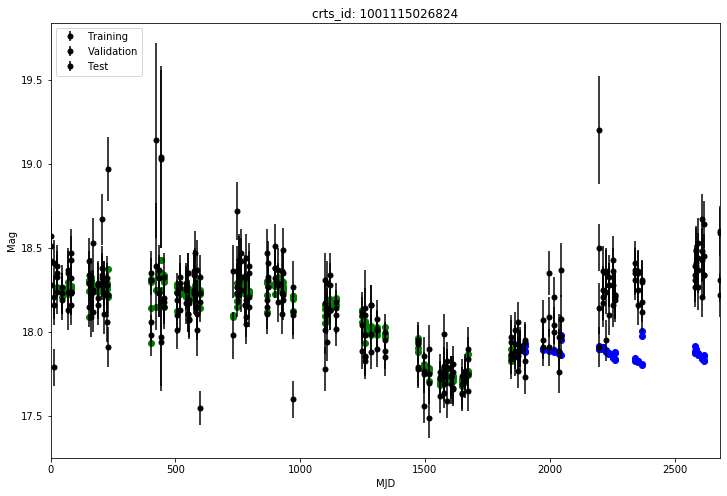

In [3]:
instance.multiple_step_prediction()

In [3]:
import pickle 
with open('/Users/mingyu/Desktop/dataset/processed_data/basic/1001115026824.pickle', 'rb') as handle: 
    file = pickle.load(handle)

(1, 87)


In [1]:
from main_pipeline import MainPipeline
main_pipeline = MainPipeline(1001115026824)

Using TensorFlow backend.


[array([20.5 , 20.35, 20.27, 19.77, 19.76, 20.31, 20.13, 20.07, 19.85,
       20.01, 20.63, 19.69, 19.26, 20.08, 20.15, 19.6 , 20.21, 21.06,
       19.71, 19.88, 19.98, 20.01, 19.97, 20.54, 19.12, 20.56, 19.84,
       20.1 , 19.89, 20.18, 19.59, 19.55, 19.44, 19.59, 19.82, 19.61,
       19.73, 19.6 , 19.51, 19.43, 19.49, 19.23, 19.61, 19.11, 19.69,
       19.42, 19.24, 18.95, 19.81, 19.2 , 19.13, 18.93, 18.68, 19.41,
       19.09, 18.4 , 19.26, 19.35, 19.12, 19.18, 19.4 , 19.27, 18.75,
       18.51, 19.2 , 18.96, 19.2 , 19.21, 19.07, 19.12, 19.22, 18.96,
       19.11, 19.13, 19.01, 18.75, 18.76, 19.28, 18.74, 19.65, 18.76,
       19.01, 18.96, 19.02, 19.11, 19.23, 18.84]), array([19.71, 19.99, 19.44, 19.19, 19.36, 20.23, 19.05, 19.45, 19.4 ,
       19.68, 19.73, 20.25, 19.53, 19.37, 19.29, 19.74, 19.  , 19.93,
       19.59, 19.45, 19.34, 18.92, 19.42, 20.16, 20.57, 19.51, 19.82,
       19.61, 19.49, 19.28, 19.58, 19.33, 19.26, 19.71, 19.89, 19.65,
       19.49, 19.46, 19.1 , 19.59, 19.

IndexError: index 141 is out of bounds for axis 0 with size 141

In [1]:
from model import mc_dnn 

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from model.mc_dnn import MCDnn
import matplotlib.pyplot as plt

In [3]:
def build_dataset(N, noise_std=0.25, is_test=True):
    x = np.random.rand(N, 1)

    if is_test:
        x = 8 * x - 4
    else:
        x = 6 * x - 3
        x[x < 0] -= 1
        x[x > 0] += 1

    # data with noise
    y = 0.1 * x ** 3 + np.random.normal(0, noise_std, size=(N, 1))

    return x, y

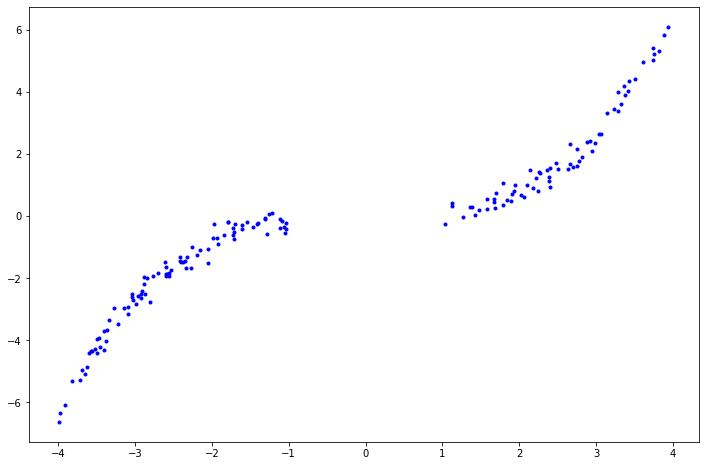

In [6]:
# Raw Data
x_train_val, y_train_val = build_dataset(200, noise_std=0.25, is_test=False)
x_test, y_test = build_dataset(80, noise_std=0.25, is_test=True)

# Split Data
num_training_examples = int(0.8 * np.shape(x_train_val)[0])
x_train = x_train_val[0:num_training_examples, :]
y_train = y_train_val[0:num_training_examples]
x_validation = x_train_val[num_training_examples:, :]
y_validation = y_train_val[num_training_examples:]

# Plot Data 
plt.figure(figsize=(12, 8))
plt.plot(x_train, y_train, 'b.')

In [9]:
# Parameters
dropout_rates = [0.005, 0.01, 0.05, 0.1]
tau_values = [0.025, 0.05, 0.075]
n_hidden = 50
num_hidden_layers = 2
n_epochs = 1000

best_network = None
best_ll = -float('inf')
best_tau = 0
best_dropout = 0
for dropout_rate in dropout_rates:
    for tau in tau_values:
        print('\nGrid search step: Tau: ' + str(tau) + ' Dropout rate: ' + str(dropout_rate))
        MC_dnn = MCDnn([int(n_hidden)] * num_hidden_layers, n_epochs=n_epochs, tau=tau, dropout=dropout_rate)
        MC_dnn.build_model(x_train, y_train)
        _, _, _, ll = MC_dnn.predict(x_validation, y_validation)

        if (ll > best_ll):
            best_ll = ll
            best_network = MC_dnn
            best_tau = tau
            best_dropout = dropout_rate
            print('Best log_likelihood changed to: ' + str(best_ll))
            print('Best tau changed to: ' + str(best_tau))
            print('Best dropout rate changed to: ' + str(best_dropout))


Grid search step: Tau: 0.025 Dropout rate: 0.005
40/40 [==============================] - 0s 912us/step
[[[ 4.2476277 ]
  [ 0.41581628]
  [ 0.9299969 ]
  ...
  [-3.246226  ]
  [ 3.4834492 ]
  [-0.43727207]]

 [[ 4.2476277 ]
  [ 0.41581628]
  [ 0.94656307]
  ...
  [-3.246226  ]
  [ 3.4834492 ]
  [-0.43727207]]

 [[ 4.1259623 ]
  [ 0.41581628]
  [ 0.9299969 ]
  ...
  [-3.246226  ]
  [ 3.277361  ]
  [-0.43727207]]

 ...

 [[ 4.0444536 ]
  [ 0.41581628]
  [ 0.7989164 ]
  ...
  [-3.246226  ]
  [ 3.4834492 ]
  [-0.43308675]]

 [[ 4.2476277 ]
  [ 0.41581628]
  [ 0.9299969 ]
  ...
  [-3.246226  ]
  [ 3.4834492 ]
  [-0.43727207]]

 [[ 4.2476277 ]
  [ 0.41581628]
  [ 0.9299969 ]
  ...
  [-3.246226  ]
  [ 3.4834492 ]
  [-0.3736498 ]]]
Best log_likelihood changed to: -2.764803296511468
Best tau changed to: 0.025
Best dropout rate changed to: 0.005

Grid search step: Tau: 0.05 Dropout rate: 0.005
40/40 [==============================] - 0s 1ms/step
[[[ 4.283468  ]
  [ 0.42336595]
  [ 0.9245453 ]
 

40/40 [==============================] - 0s 5ms/step
[[[ 3.8939412 ]
  [-0.33091262]
  [ 0.85850525]
  ...
  [-3.2954733 ]
  [ 3.720148  ]
  [-0.45200753]]

 [[ 4.1134562 ]
  [ 0.23675606]
  [ 0.8010076 ]
  ...
  [-2.8625531 ]
  [ 3.0690205 ]
  [-0.48194575]]

 [[ 3.8748088 ]
  [ 0.39193168]
  [ 0.7908673 ]
  ...
  [-3.2157292 ]
  [ 3.6695154 ]
  [-0.45198366]]

 ...

 [[ 4.7550364 ]
  [ 0.34650123]
  [ 0.87150776]
  ...
  [-0.25807595]
  [ 3.0719008 ]
  [-0.25807595]]

 [[-0.33091262]
  [ 0.3303855 ]
  [ 1.1154587 ]
  ...
  [-3.2115676 ]
  [ 3.1238952 ]
  [-0.3831303 ]]

 [[ 4.791987  ]
  [ 0.40538242]
  [ 1.0162585 ]
  ...
  [-3.137291  ]
  [ 3.3228877 ]
  [-0.33091262]]]


In [38]:
best_network = MCDnn([int(n_hidden)] * num_hidden_layers, n_epochs=n_epochs, tau=best_tau, dropout=best_dropout)
best_network.build_model(norm_x_train, norm_y_train)
standard_pred, MC_pred, MC_std, ll = best_network.predict(x_test, y_test)

80/80 [==============================] - 0s 5ms/step


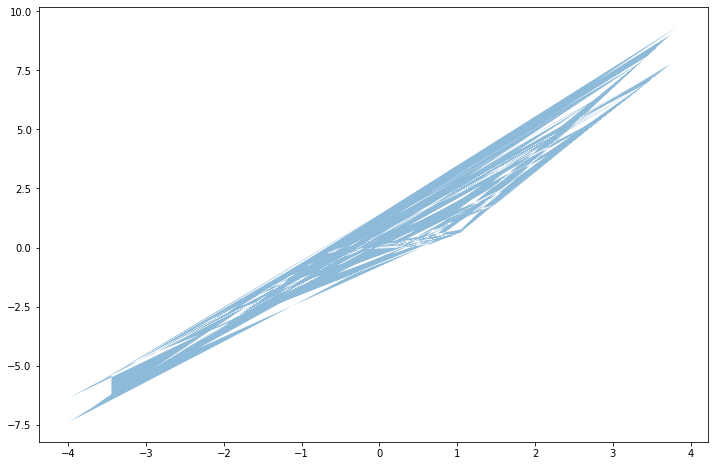

In [60]:
MC_pred_high = (MC_pred + MC_std).reshape(80)
MC_pred_low = (MC_pred - MC_std).reshape(80)
x_test = x_test.reshape(80)
plt.figure(figsize=(12, 8))
plt.fill_between(x_test, y1=MC_pred_high, y2=MC_pred_low, alpha=0.5)

/Users/mingyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

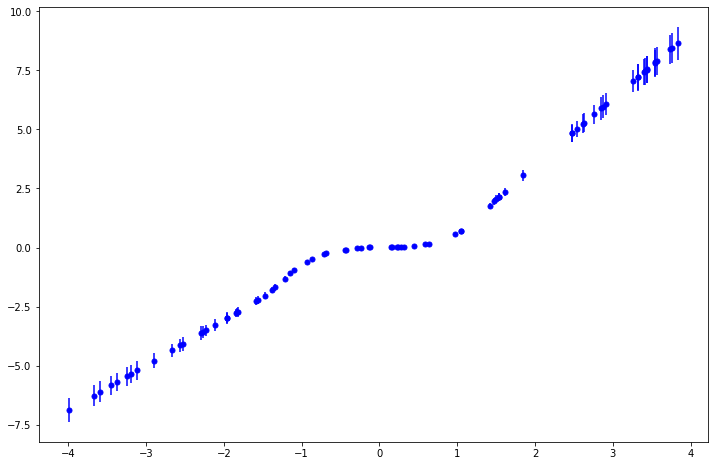

In [65]:
plt.figure(figsize=(12, 8))
plt.errorbar(x_test, MC_pred, MC_std, fmt='b.', markersize=10, label='Validation')